In [1]:
#https://www.tensorflow.org/tutorials/keras/regression
#https://www.youtube.com/watch?v=g2t7M2HTZ9U&ab_channel=PythonEngineer

import os
import pandas as pd

#Create a list of column names to be used for the dataframe
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']


#Specify current working directory
cwd = os.getcwd()

#Identify the datafile in the current working directory and it's filepath
#Read it into a dataframe and add column names to the features
for file in os.listdir(cwd):
    if file.endswith('.data'):
        print(file)
        filepath = cwd + '\\' + file
        dataset  = pd.read_csv(filepath,names=column_names,na_values='?', comment='\t',sep=' ', skipinitialspace=True)


auto-mpg.data


In [2]:
#Review/check the info of the dataframe
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    392 non-null    float64
 4   Weight        398 non-null    float64
 5   Acceleration  398 non-null    float64
 6   Model Year    398 non-null    int64  
 7   Origin        398 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 25.0 KB


In [3]:
#Have a look at the first few rows of the dataframe
dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [4]:
#create html file for pandas profiling of dataset - having a more detailed understanding of the data
#Also identifies possible issues such as missing values

import pandas_profiling
profile = dataset.profile_report(title='Pandas Profiling Report')
profile.to_file(output_file="pandas_profiling.html")

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 100.26it/s]


In [5]:
#Render the pandas profile within vscode
#profile.to_notebook_iframe()

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

In [7]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
print(tf.__version__)

2.10.1


In [8]:
#View NA records - these are shown in the pandas profile as well
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [9]:
# drop records with null
dataset = dataset.dropna()

In [10]:
# The 'Origin' feature is categorical - replace the numeric values with country labels
dataset['Origin'] = dataset['Origin'].map(({1:'USA',2:'Europe',3:'Japan'}))

C:\Users\mason\AppData\Local\Temp/ipykernel_21300/3528381508.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Origin'] = dataset['Origin'].map(({1:'USA',2:'Europe',3:'Japan'}))


In [11]:
#Dummify the categorical origin feature to individual binary features for each value
dataset = pd.get_dummies(dataset, columns=['Origin'], prefix='', prefix_sep='')
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
393,27.0,4,140.0,86.0,2790.0,15.6,82,0,0,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,1,0,0
395,32.0,4,135.0,84.0,2295.0,11.6,82,0,0,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,0,0,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,0,0,1


In [12]:
#Create a training and test datasets that are exclusive of eachother
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

In [13]:
#Summary of descriptive stats for training dataset
train_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MPG,314.0,23.310510,7.728652,10.0,17.00,22.0,28.95,46.6
Cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
Model Year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0
Europe,314.0,0.178344,0.383413,0.0,0.00,0.0,0.00,1.0
Japan,314.0,0.197452,0.398712,0.0,0.00,0.0,0.00,1.0
USA,314.0,0.624204,0.485101,0.0,0.00,1.0,1.00,1.0


In [14]:
#Create a list of training and test dataset features 
train_features = train_dataset.copy()
test_features = test_dataset.copy()

#Remove the outcome variable 'MPG' (the label) from the feature datasets 
train_labels = train_features.pop('MPG')
test_labels = test_features.pop('MPG')

In [15]:
#Summary of select descriptive stats from train_dataset
#Observe that features have substiantlly different scales and ranges
#This can cause issues/inefficiencies with training/optimising the model
#Specifically - varying scales can interfere with the weightings/gradients
#With some features being dominated and others dominating - interfering with the model

train_dataset.describe().transpose()[['mean', 'std']]

,mean,std
MPG,23.310510,7.728652
Cylinders,5.477707,1.699788
Displacement,195.318471,104.331589
Horsepower,104.869427,38.096214
Weight,2990.251592,843.898596
Acceleration,15.559236,2.789230
Model Year,75.898089,3.675642
Europe,0.178344,0.383413
Japan,0.197452,0.398712
USA,0.624204,0.485101


In [16]:
#Normalization of data is a simple best practice to manage the issues related to variables of different scales
#The step below create a layer to assist with normalizing data
normalizer = tf.keras.layers.Normalization(axis=-1)

In [17]:
#Then run the train_features dataset through the normalizer layer to calculate the mean and variance of the dataset
#https://www.tensorflow.org/api_docs/python/tf/keras/layers/Normalization#adapt
normalizer.adapt(np.array(train_features))

In [18]:
#View the train_features feature means returned as an array
normalizer.mean.numpy()

array([[   5.478,  195.318,  104.869, 2990.252,   15.559,   75.898,
           0.178,    0.197,    0.624]], dtype=float32)

In [19]:
train_features.head()

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
146,4,90.0,75.0,2125.0,14.5,74,0,0,1
282,4,140.0,88.0,2890.0,17.3,79,0,0,1
69,8,350.0,160.0,4456.0,13.5,72,0,0,1
378,4,105.0,63.0,2125.0,14.7,82,0,0,1
331,4,97.0,67.0,2145.0,18.0,80,0,1,0


In [20]:
#Return the first row of the train_features dataset as first
first = np.array(train_features[:1])
first

array([[   4. ,   90. ,   75. , 2125. ,   14.5,   74. ,    0. ,    0. ,
           1. ]])

In [21]:
#Run the first row through the normalizer layer to normalize it  - produce the normalized output
#Comparing this output to above shows how the values have been normalized
normalizer(first).numpy()

array([[-0.871, -1.011, -0.785, -1.027, -0.38 , -0.517, -0.466, -0.496,
         0.776]], dtype=float32)

In [22]:
linear_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(units=1)
])

In [23]:
linear_model.predict(train_features[:10])

1/1 [==============================] - 0s 67ms/step


array([[ 0.555],
       [-0.739],
       [-1.109],
       [ 0.905],
       [ 1.005],
       [-0.404],
       [ 1.028],
       [-1.158],
       [-0.461],
       [ 0.142]], dtype=float32)

In [24]:
#cheaking the weights of the model
linear_model.layers[1].kernel

<tf.Variable 'dense/kernel:0' shape=(9, 1) dtype=float32, numpy=
array([[ 0.082],
       [ 0.589],
       [-0.755],
       [-0.683],
       [-0.745],
       [ 0.037],
       [-0.318],
       [-0.12 ],
       [-0.7  ]], dtype=float32)>

In [25]:
linear_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [26]:
%%time
history = linear_model.fit(
    train_features,
    train_labels,
    epochs=100,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

Wall time: 3.15 s


In [27]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)

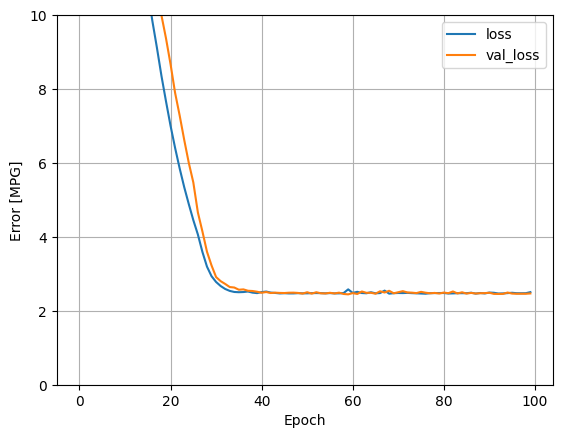

In [28]:
plot_loss(history)

In [32]:
test_results = {}

test_results['linear_model'] = linear_model.evaluate(
    test_features, test_labels, verbose=0)

In [33]:
#Review performance of model(s)

pd.DataFrame(test_results, index=['Mean absolute error [MPG]']).T

,Mean absolute error [MPG]
linear_model,2.478709


3/3 [==============================] - 0s 997us/step


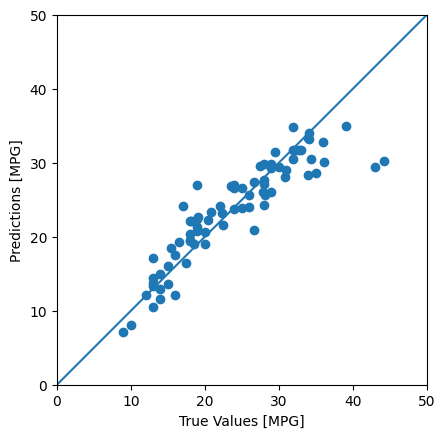

In [34]:
#Charting the predicted MPG values of the multiple regression model for test data against the true MPG values from test data

test_predictions = linear_model.predict(test_features).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)